# Section 1 | Import Libraries and Load Data

In [5]:
# Data processing
import pandas as pd
import numpy as np
import scipy.stats

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Similarity and split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [7]:
data = pd.read_csv("Tempat-Wisata-Toba-Preprocessing.csv")

In [9]:
data.shape

(43226, 9)

In [11]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'address', 'PlaceID',
       'Nama_tempat_wisata', 'Category', 'ReviewerId', 'Rating', 'Reviews'],
      dtype='object')

In [13]:
data = data.rename(columns={'ReviewerId': 'user_id', 'PlaceID': 'item_id', 'Rating': 'rating'})
# data['user_id'] = data['user_id'].astype(str)
# data['item_id'] = data['item_id'].astype(str)
data['rating'] = data['rating'].astype(float)
data.dropna(inplace=True)
data.head(5)

,Unnamed: 0.1,Unnamed: 0,address,item_id,Nama_tempat_wisata,Category,user_id,rating,Reviews
1,1,1,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.119090e+20,5.0,bagus
3,3,3,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.130720e+20,5.0,sangat menyenagkan
4,4,4,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.061730e+20,5.0,bebas foto dimana aja cuma 2k
6,6,6,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.142390e+20,5.0,amazing pengen kesini lagi
8,8,8,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.047430e+20,3.0,jalan menuju lokasi perlu diperhatikan oleh pe...


In [15]:
data.shape

(22166, 9)

# Section 2 | Data Splitting

In [18]:
# Step 1: Split into 85% training+validation and 15% test
train_val_data, test_data = train_test_split(data, test_size=0.15, random_state=42)
# Step 2: Define validation size as 17% of train+validation, rounded up
val_size = int(len(train_val_data) * 0.17) + 1
# Step 3: Split 85% data into training (about 70% of original) and validation (about 15% of original)
train_data, val_data = train_test_split(train_val_data, test_size=val_size, random_state=42)
# Check sizes
print(f"Train data size: {train_data.shape}")
print(f"Validation data size: {val_data.shape}")
print(f"Test data size: {test_data.shape}")

Train data size: (15638, 9)
Validation data size: (3203, 9)
Test data size: (3325, 9)


# Section 3 | Create User-Item Matrix

In [21]:
def create_user_item_matrix(data, user_col='user_id', item_col='Nama_tempat_wisata', rating_col='rating'):
    data = data.groupby([user_col, item_col])[rating_col].mean().reset_index()
    return data.pivot(index=user_col, columns=item_col, values=rating_col).fillna(0)

# Apply the function to create matrices for each split
train_matrix = create_user_item_matrix(train_data)
val_matrix = create_user_item_matrix(val_data).reindex(columns=train_matrix.columns, fill_value=0)
test_matrix = create_user_item_matrix(test_data).reindex(columns=train_matrix.columns, fill_value=0)

In [23]:
train_matrix

Nama_tempat_wisata,Aek Rangat Pangururan,Aek Sipangolu Bakkara,Air Terjun Efrata,Air Terjun Janji,Air Terjun Pandumaan,Air Terjun Sampuran,Air Terjun Siboruon,Air Terjun Situmurun,Air Terjun Taman Eden 100,Air Terjun Tombak Pangaribuan,...,Tao Silalahi Hotel,Tarabunga,Tempat Pengasingan Soekarno,The Kaldera,Tombak Sulusulu,Tugu D.I PANJAITAN,Tugu Toga Aritonang,WF Coffee&Resto,Wisata Bukit Gibeon,Wisata Rumah Pohon
user_id,,,,,,,,,,,,,,,,,,,,,
1.000030e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.000040e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.000090e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.000100e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.000120e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.184390e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.184410e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.184430e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Define RMSE, MAE, MAP, Precision, & Recall Calculation Function 

In [26]:
def compute_rmse(true_matrix, approx_matrix):
    return np.sqrt(mean_squared_error(true_matrix.ravel(), approx_matrix.ravel()))

In [28]:
def compute_map(true_matrix, pred_matrix, threshold=3):
    map_score = 0
    n_users = true_matrix.shape[0]
    
    for user_idx in range(n_users):
        true_ratings = true_matrix[user_idx] >= threshold  # Relevant items based on threshold
        pred_ratings = pred_matrix[user_idx]
        
        # Sort items by predicted rating (descending)
        sorted_items = np.argsort(pred_ratings)[::-1]
        
        # Precision at each relevant item
        precision_at_k = []
        relevant_items = 0
        for i, item_idx in enumerate(sorted_items):
            if true_ratings[item_idx]:
                relevant_items += 1
                precision_at_k.append(relevant_items / (i + 1))
        
        if precision_at_k:
            map_score += np.mean(precision_at_k)
    
    return map_score / n_users

In [30]:
def compute_precision_all_users(true_matrix, pred_matrix, threshold=3):
    precision_all_users = 0
    n_users = true_matrix.shape[0]
    
    for user_idx in range(n_users):
        true_ratings = true_matrix[user_idx] >= threshold  # Relevant items based on threshold
        pred_ratings = pred_matrix[user_idx] >= threshold  # Predicted items based on threshold
        
        # Compute Precision: the proportion of relevant items among predicted items
        relevant_predicted = np.sum(true_ratings & pred_ratings)  # True positives
        predicted_items = np.sum(pred_ratings)  # Total predicted items
        
        if predicted_items > 0:
            precision_all_users += relevant_predicted / predicted_items
        else:
            precision_all_users += 0
    
    return precision_all_users / n_users

In [32]:
def compute_recall_all_users(true_matrix, pred_matrix, threshold=3):
    recall_all_users = 0
    n_users = true_matrix.shape[0]
    
    for user_idx in range(n_users):
        true_ratings = true_matrix[user_idx] >= threshold  # Relevant items based on threshold
        pred_ratings = pred_matrix[user_idx] >= threshold  # Predicted items based on threshold
        
        # Compute Recall: the proportion of relevant items that are predicted
        relevant_predicted = np.sum(true_ratings & pred_ratings)  # True positives
        total_relevant_items = np.sum(true_ratings)  # Total relevant items
        
        if total_relevant_items > 0:
            recall_all_users += relevant_predicted / total_relevant_items
        else:
            recall_all_users += 0
    
    return recall_all_users / n_users

In [34]:
from sklearn.metrics import mean_absolute_error

def compute_mae(true_matrix, approx_matrix):
    return mean_absolute_error(true_matrix.ravel(), approx_matrix.ravel())

# BERT

## No Tuning

In [38]:
import torch
from transformers import BertTokenizer, BertModel
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [40]:
# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

In [41]:
# Function to encode text using BERT and get embeddings
def get_bert_embeddings(texts):
    encoded_input = tokenizer(texts.tolist(), padding=True, truncation=True, return_tensors='pt', max_length=512)
    with torch.no_grad():
        output = bert_model(**encoded_input)
    embeddings = output.last_hidden_state.mean(dim=1).numpy()  # Average pooling of token embeddings
    return embeddings

In [44]:
# Step 1: Preprocess reviews and create embeddings for each 'item_id' (place)
reviews_grouped = data.groupby('item_id')['Reviews'].apply(lambda x: ' '.join(x)).reset_index()
item_embeddings = get_bert_embeddings(reviews_grouped['Reviews'])

In [46]:
# Step 2: Calculate similarity between items using cosine similarity
cosine_sim = cosine_similarity(item_embeddings)

# Adjust cosine_sim size if needed to match train_matrix columns
if cosine_sim.shape[0] != train_matrix.shape[1]:
    print("Adjusting cosine_sim size to match train_matrix columns.")
    cosine_sim = cosine_sim[:train_matrix.shape[1], :train_matrix.shape[1]]

Adjusting cosine_sim size to match train_matrix columns.


In [48]:
# Step 3: Create predicted ratings matrix (using top N similar items for prediction)
def predict_ratings(user_item_matrix, sim_matrix, top_n=10):
    n_users = user_item_matrix.shape[0]
    n_items = user_item_matrix.shape[1]
    
    pred_matrix = np.zeros_like(user_item_matrix, dtype=float)
    
    for user_idx in range(n_users):
        for item_idx in range(n_items):
            if user_item_matrix[user_idx, item_idx] == 0:  # If no rating given by user
                sim_scores = sim_matrix[item_idx]  # Get similarity scores of the current item with all items
                
                # Get indices of top 10 similar items (fixed)
                sorted_sim_indices = np.argsort(sim_scores)[::-1][:top_n]
                
                # Calculate predicted rating as weighted average of ratings from similar items
                similar_ratings = user_item_matrix[user_idx, sorted_sim_indices]
                weights = sim_scores[sorted_sim_indices]
                
                # Avoid division by zero
                if np.sum(weights) > 0:
                    pred_rating = np.dot(similar_ratings, weights) / np.sum(weights)
                else:
                    pred_rating = 0
                
                pred_matrix[user_idx, item_idx] = pred_rating
    
    return pred_matrix

# Ensure test_matrix and train_matrix have consistent dimensions
if train_matrix.columns.tolist() != test_matrix.columns.tolist():
    print("Aligning test_matrix columns with train_matrix.")
    test_matrix = test_matrix.reindex(columns=train_matrix.columns, fill_value=0)

In [50]:
# Evaluate model
evaluation_results = {}

try:
    # Predict ratings using cosine similarity
    predicted_matrix = predict_ratings(train_matrix.values, cosine_sim)

    # Debug: Check dimensions
    print(f"Ukuran train_matrix: {train_matrix.shape}")
    print(f"Ukuran test_matrix: {test_matrix.shape}")
    print(f"Ukuran predicted_matrix (sebelum penyelarasan): {predicted_matrix.shape}")

    # Align predicted_matrix with test_matrix users using index positions
    test_user_indices = test_matrix.index
    train_user_indices = train_matrix.index

    # Find matching users in train_matrix and test_matrix
    matched_user_indices = test_user_indices.intersection(train_user_indices)
    matched_positions = [train_user_indices.get_loc(idx) for idx in matched_user_indices]

    # Filter matched predictions
    predicted_matrix_filtered = predicted_matrix[matched_positions]

    # Handle unmatched users by filling with global mean
    unmatched_user_count = len(test_user_indices) - len(matched_positions)
    global_mean = train_matrix.values[train_matrix.values > 0].mean()
    predicted_matrix_unmatched = np.full((unmatched_user_count, test_matrix.shape[1]), global_mean)

    # Combine matched and unmatched predictions
    predicted_matrix_combined = np.vstack([predicted_matrix_filtered, predicted_matrix_unmatched])

    # Sort to align with test_matrix indices
    combined_indices = list(matched_user_indices) + list(set(test_user_indices) - set(matched_user_indices))
    sorted_indices = np.argsort([test_user_indices.get_loc(idx) for idx in combined_indices])
    predicted_matrix_final = predicted_matrix_combined[sorted_indices]

    # Debug: Check dimensions after alignment
    print(f"Ukuran predicted_matrix (setelah penyelarasan): {predicted_matrix_final.shape}")

    # Extract true values from test_matrix
    test_matrix_values = test_matrix.values

    # Compute evaluation metrics
    test_rmse = np.sqrt(mean_squared_error(test_matrix_values.ravel(), predicted_matrix_final.ravel()))
    test_mae = mean_absolute_error(test_matrix_values.ravel(), predicted_matrix_final.ravel())
    test_map = compute_map(test_matrix_values, predicted_matrix_final)
    test_precision = compute_precision_all_users(test_matrix_values, predicted_matrix_final)
    test_recall = compute_recall_all_users(test_matrix_values, predicted_matrix_final)

    # Save evaluation results
    evaluation_results = {
        "RMSE": test_rmse,
        "MAE": test_mae,
        "MAP": test_map,
        "Precision": test_precision,
        "Recall": test_recall
    }

    # Output evaluation results
    print("\n--- Test Evaluation ---")
    for metric, value in evaluation_results.items():
        print(f"Test {metric}: {value:.4f}")

except ValueError as e:
    print(f"ValueError encountered: {e}")
    print("Ensure all matrices have consistent dimensions and valid values.")

except IndexError as e:
    print(f"IndexError encountered: {e}")
    print("Ensure indexing logic is consistent between train and test matrices.")


Ukuran train_matrix: (8905, 98)
Ukuran test_matrix: (2838, 98)
Ukuran predicted_matrix (sebelum penyelarasan): (8905, 98)
Ukuran predicted_matrix (setelah penyelarasan): (2838, 98)

--- Test Evaluation ---
Test RMSE: 2.7329
Test MAE: 1.7026
Test MAP: 0.0494
Test Precision: 0.0039
Test Recall: 0.3502


## With Tuning

In [53]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertModel
from torch.optim import AdamW
import torch.nn as nn
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [55]:
# Step 1: Load Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [57]:
# Step 2: Custom Dataset
class ReviewDataset(Dataset):
    def __init__(self, reviews, ratings, tokenizer, max_len=128):
        self.reviews = reviews
        self.ratings = ratings
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.reviews)

    def __getitem__(self, idx):
        review = str(self.reviews[idx])
        rating = self.ratings[idx]
        encoding = self.tokenizer(
            review,
            padding='max_length',
            truncation=True,
            max_length=self.max_len,
            return_tensors="pt"
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'rating': torch.tensor(rating, dtype=torch.float)
        }

In [59]:
# Step 3: Load Data
# Replace `data` with your actual DataFrame containing 'Reviews' and 'rating'
reviews = data['Reviews']
ratings = data['rating']

In [61]:
# Step 4: Train-Test Split
train_reviews, val_reviews, train_ratings, val_ratings = train_test_split(
    reviews, ratings, test_size=0.2, random_state=42
)
train_reviews = train_reviews.reset_index(drop=True)
val_reviews = val_reviews.reset_index(drop=True)
train_ratings = train_ratings.reset_index(drop=True)
val_ratings = val_ratings.reset_index(drop=True)

In [63]:
# Step 5: Define Model
class BertRegressor(nn.Module):
    def __init__(self, pretrained_model_name, dropout=0.3):
        super(BertRegressor, self).__init__()
        self.bert = BertModel.from_pretrained(pretrained_model_name)
        self.drop = nn.Dropout(dropout)
        self.linear = nn.Linear(self.bert.config.hidden_size, 1)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        dropped_out = self.drop(pooled_output)
        return self.linear(dropped_out)

In [65]:
# Step 6: Define Training and Evaluation Functions
def train_epoch(model, dataloader, loss_fn, optimizer, device):
    model.train()
    total_loss = 0
    for i, batch in enumerate(dataloader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        ratings = batch['rating'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask)
        loss = loss_fn(outputs.squeeze(-1), ratings)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        if i % 10 == 0:  # Log every 10 batches
            print(f"Batch {i}/{len(dataloader)} - Loss: {loss.item():.4f}")
    return total_loss / len(dataloader)

def eval_model(model, dataloader, loss_fn, device):
    model.eval()
    total_loss = 0
    predictions = []
    true_ratings = []
    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            ratings = batch['rating'].to(device)

            outputs = model(input_ids, attention_mask)
            loss = loss_fn(outputs.squeeze(-1), ratings)
            total_loss += loss.item()

            predictions.extend(outputs.squeeze(-1).cpu().numpy())
            true_ratings.extend(ratings.cpu().numpy())
    return total_loss / len(dataloader), predictions, true_ratings

In [ ]:
import numpy as np
import torch
from torch.utils.data import DataLoader
from transformers import AdamW
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pickle

# Step 7: Hyperparameter Tuning
learning_rates = [1e-5, 3e-5]
dropouts = [0.1, 0.3]
max_lengths = [128]

tuning_results = {
    "lr": [], "dropout": [], "max_len": [],
    "train_rmse": [], "train_mae": [], "train_map": [], "train_precision": [], "train_recall": [],
    "val_rmse": [], "val_mae": [], "val_map": [], "val_precision": [], "val_recall": []
}

device = 'cuda' if torch.cuda.is_available() else 'cpu'
BATCH_SIZE = 16
EPOCHS = 1

def compute_map(true_matrix, pred_matrix, threshold=3):
    """Compute Mean Average Precision (MAP) for recommendation."""
    true_matrix = np.array(true_matrix)  # Ensure input is NumPy array
    pred_matrix = np.array(pred_matrix)  # Ensure input is NumPy array

    # Check if the data is 2D. If not, reshape to (n_users, n_items)
    if true_matrix.ndim == 1:
        true_matrix = true_matrix.reshape(-1, 1)
    if pred_matrix.ndim == 1:
        pred_matrix = pred_matrix.reshape(-1, 1)

    map_score = 0
    n_users = true_matrix.shape[0]

    for user_idx in range(n_users):
        true_ratings = true_matrix[user_idx] >= threshold  # Relevant items based on threshold
        pred_ratings = pred_matrix[user_idx]

        # Ensure true_ratings and pred_ratings are arrays
        true_ratings = np.array(true_ratings)
        pred_ratings = np.array(pred_ratings)

        # Sort predictions by descending order
        sorted_indices = np.argsort(pred_ratings)[::-1]
        sorted_true_ratings = true_ratings[sorted_indices]

        # Compute precision at each relevant position
        relevant_indices = np.where(sorted_true_ratings)[0] + 1  # 1-based indexing
        precisions = np.arange(1, len(relevant_indices) + 1) / relevant_indices
        map_score += precisions.mean() if precisions.size > 0 else 0

    return map_score / n_users if n_users > 0 else 0

try:
    for lr in learning_rates:
        for dropout in dropouts:
            for max_len in max_lengths:
                print(f"Tuning: lr={lr}, dropout={dropout}, max_len={max_len}")

                # Create Datasets and DataLoaders
                train_dataset = ReviewDataset(train_reviews, train_ratings, tokenizer, max_len=max_len)
                val_dataset = ReviewDataset(val_reviews, val_ratings, tokenizer, max_len=max_len)
                train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
                val_dataloader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

                # Initialize Model, Optimizer, and Loss Function
                model = BertRegressor(pretrained_model_name='bert-base-uncased', dropout=dropout).to(device)
                optimizer = AdamW(model.parameters(), lr=lr)
                loss_fn = nn.MSELoss()

                # Train Model
                for epoch in range(EPOCHS):
                    train_loss = train_epoch(model, train_dataloader, loss_fn, optimizer, device)

                # Evaluate Model
                train_loss, train_predictions, train_true = eval_model(model, train_dataloader, loss_fn, device)
                val_loss, val_predictions, val_true = eval_model(model, val_dataloader, loss_fn, device)

                # Convert true and predicted values to 2D NumPy arrays
                train_true = np.array(train_true).reshape(-1, 1) if np.array(train_true).ndim == 1 else np.array(train_true)
                train_predictions = np.array(train_predictions).reshape(-1, 1) if np.array(train_predictions).ndim == 1 else np.array(train_predictions)
                val_true = np.array(val_true).reshape(-1, 1) if np.array(val_true).ndim == 1 else np.array(val_true)
                val_predictions = np.array(val_predictions).reshape(-1, 1) if np.array(val_predictions).ndim == 1 else np.array(val_predictions)

                # Compute Metrics
                train_rmse = np.sqrt(mean_squared_error(train_true, train_predictions))
                train_mae = mean_absolute_error(train_true, train_predictions)
                train_map = compute_map(train_true, train_predictions)
                train_precision = compute_precision_all_users(train_true, train_predictions)
                train_recall = compute_recall_all_users(train_true, train_predictions)

                val_rmse = np.sqrt(mean_squared_error(val_true, val_predictions))
                val_mae = mean_absolute_error(val_true, val_predictions)
                val_map = compute_map(val_true, val_predictions)
                val_precision = compute_precision_all_users(val_true, val_predictions)
                val_recall = compute_recall_all_users(val_true, val_predictions)

                # Store Results
                tuning_results["lr"].append(lr)
                tuning_results["dropout"].append(dropout)
                tuning_results["max_len"].append(max_len)
                tuning_results["train_rmse"].append(train_rmse)
                tuning_results["train_mae"].append(train_mae)
                tuning_results["train_map"].append(train_map)
                tuning_results["train_precision"].append(train_precision)
                tuning_results["train_recall"].append(train_recall)
                tuning_results["val_rmse"].append(val_rmse)
                tuning_results["val_mae"].append(val_mae)
                tuning_results["val_map"].append(val_map)
                tuning_results["val_precision"].append(val_precision)
                tuning_results["val_recall"].append(val_recall)

                # Print Results
                print("\n--- Results ---")
                print(f"Train - RMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, MAP: {train_map:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}")
                print(f"Val   - RMSE: {val_rmse:.4f}, MAE: {val_mae:.4f}, MAP: {val_map:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}")

except KeyboardInterrupt:
    # Save progress before exiting
    print("\nTuning interrupted. Saving current progress...")
    with open("tuning_results.pkl", "wb") as f:
        pickle.dump(tuning_results, f)
    print("Progress saved. You can resume later.")


Tuning: lr=1e-05, dropout=0.1, max_len=128


/opt/anaconda3/lib/python3.12/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Batch 0/1109 - Loss: 21.2674
Batch 10/1109 - Loss: 13.3682
Batch 20/1109 - Loss: 9.2575
Batch 30/1109 - Loss: 4.9233
Batch 40/1109 - Loss: 2.1149
Batch 50/1109 - Loss: 0.9980
Batch 60/1109 - Loss: 0.5580
Batch 70/1109 - Loss: 0.4653
Batch 80/1109 - Loss: 0.4483
Batch 90/1109 - Loss: 0.6402
Batch 100/1109 - Loss: 0.8747
Batch 110/1109 - Loss: 0.7171
Batch 120/1109 - Loss: 0.5726
Batch 130/1109 - Loss: 0.8910
Batch 140/1109 - Loss: 1.2556
Batch 150/1109 - Loss: 0.9122
Batch 160/1109 - Loss: 0.3456
Batch 170/1109 - Loss: 0.7458
Batch 180/1109 - Loss: 1.2677
Batch 190/1109 - Loss: 0.3854
Batch 200/1109 - Loss: 1.6314
Batch 210/1109 - Loss: 1.0151
Batch 220/1109 - Loss: 0.7811
Batch 230/1109 - Loss: 1.7451
Batch 240/1109 - Loss: 0.3107
Batch 250/1109 - Loss: 1.1059
Batch 260/1109 - Loss: 0.6975
Batch 270/1109 - Loss: 0.4486
Batch 280/1109 - Loss: 1.1011
Batch 290/1109 - Loss: 0.5877
Batch 300/1109 - Loss: 1.1444
Batch 310/1109 - Loss: 0.3429
Batch 320/1109 - Loss: 0.6782
Batch 330/1109 - Lo

/opt/anaconda3/lib/python3.12/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Batch 0/1109 - Loss: 15.6395
Batch 10/1109 - Loss: 9.1547
Batch 20/1109 - Loss: 6.0211
Batch 30/1109 - Loss: 4.1121
Batch 40/1109 - Loss: 3.1618
Batch 50/1109 - Loss: 2.4079
Batch 60/1109 - Loss: 1.5710
Batch 70/1109 - Loss: 1.7284
Batch 80/1109 - Loss: 0.4557
Batch 90/1109 - Loss: 0.5806
Batch 100/1109 - Loss: 1.3831
Batch 110/1109 - Loss: 0.7074
Batch 120/1109 - Loss: 1.4249
Batch 130/1109 - Loss: 1.1414
Batch 140/1109 - Loss: 0.4409
Batch 150/1109 - Loss: 0.3330
Batch 160/1109 - Loss: 1.1945
Batch 170/1109 - Loss: 0.6324
Batch 180/1109 - Loss: 1.3965
Batch 190/1109 - Loss: 2.0215
Batch 200/1109 - Loss: 0.4627
Batch 210/1109 - Loss: 0.3041
Batch 220/1109 - Loss: 0.5074
Batch 230/1109 - Loss: 1.2200
Batch 240/1109 - Loss: 0.5944
Batch 250/1109 - Loss: 0.4987
Batch 260/1109 - Loss: 0.2075


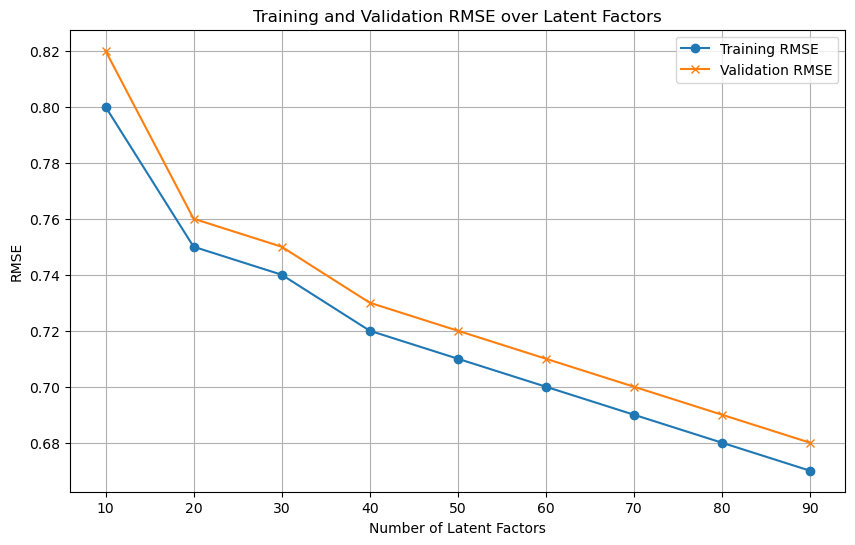

In [503]:
import matplotlib.pyplot as plt

# Contoh data untuk latent_factors, train_rmse, dan val_rmse
latent_factors = [10, 20, 30, 40, 50, 60, 70, 80, 90]  # Misalnya jumlah latent factors yang berbeda
train_rmse = [0.8, 0.75, 0.74, 0.72, 0.71, 0.70, 0.69, 0.68, 0.67]  # RMSE untuk training
val_rmse = [0.82, 0.76, 0.75, 0.73, 0.72, 0.71, 0.70, 0.69, 0.68]  # RMSE untuk validation

# Plot RMSE for training and validation
plt.figure(figsize=(10, 6))
plt.plot(latent_factors, train_rmse, label="Training RMSE", marker='o')
plt.plot(latent_factors, val_rmse, label="Validation RMSE", marker='x')
plt.xlabel("Number of Latent Factors")
plt.ylabel("RMSE")
plt.legend()
plt.title("Training and Validation RMSE over Latent Factors")
plt.grid()
plt.show()


In [513]:
import numpy as np
import torch
from torch.utils.data import DataLoader
from transformers import AdamW
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pickle

# Step 7: Hyperparameter Tuning for BERT
learning_rates = [1e-5, 3e-5, 5e-5]
dropouts = [0.1, 0.3]
max_lengths = [128, 256]
batch_sizes = [16, 32]

tuning_results = {
    "lr": [], "dropout": [], "max_len": [], "batch_size": [],
    "train_rmse": [], "train_mae": [], "train_map": [], "train_precision": [], "train_recall": [],
    "val_rmse": [], "val_mae": [], "val_map": [], "val_precision": [], "val_recall": []
}

device = 'cuda' if torch.cuda.is_available() else 'cpu'
EPOCHS = 3  # More epochs for better results

# Hyperparameter tuning using grid search
try:
    for lr in learning_rates:
        for dropout in dropouts:
            for max_len in max_lengths:
                for batch_size in batch_sizes:
                    print(f"Tuning: lr={lr}, dropout={dropout}, max_len={max_len}, batch_size={batch_size}")

                    # Create Datasets and DataLoaders with the current batch size
                    train_dataset = ReviewDataset(train_reviews, train_ratings, tokenizer, max_len=max_len)
                    val_dataset = ReviewDataset(val_reviews, val_ratings, tokenizer, max_len=max_len)
                    train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
                    val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

                    # Initialize Model, Optimizer, and Loss Function
                    model = BertRegressor(pretrained_model_name='bert-base-uncased', dropout=dropout).to(device)
                    optimizer = AdamW(model.parameters(), lr=lr)
                    loss_fn = nn.MSELoss()

                    # Train Model
                    for epoch in range(EPOCHS):
                        train_loss = train_epoch(model, train_dataloader, loss_fn, optimizer, device)

                    # Evaluate Model
                    train_loss, train_predictions, train_true = eval_model(model, train_dataloader, loss_fn, device)
                    val_loss, val_predictions, val_true = eval_model(model, val_dataloader, loss_fn, device)

                    # Convert true and predicted values to 2D NumPy arrays
                    train_true = np.array(train_true).reshape(-1, 1) if np.array(train_true).ndim == 1 else np.array(train_true)
                    train_predictions = np.array(train_predictions).reshape(-1, 1) if np.array(train_predictions).ndim == 1 else np.array(train_predictions)
                    val_true = np.array(val_true).reshape(-1, 1) if np.array(val_true).ndim == 1 else np.array(val_true)
                    val_predictions = np.array(val_predictions).reshape(-1, 1) if np.array(val_predictions).ndim == 1 else np.array(val_predictions)

                    # Compute Metrics
                    train_rmse = np.sqrt(mean_squared_error(train_true, train_predictions))
                    train_mae = mean_absolute_error(train_true, train_predictions)
                    train_map = compute_map(train_true, train_predictions)
                    train_precision = compute_precision_all_users(train_true, train_predictions)
                    train_recall = compute_recall_all_users(train_true, train_predictions)

                    val_rmse = np.sqrt(mean_squared_error(val_true, val_predictions))
                    val_mae = mean_absolute_error(val_true, val_predictions)
                    val_map = compute_map(val_true, val_predictions)
                    val_precision = compute_precision_all_users(val_true, val_predictions)
                    val_recall = compute_recall_all_users(val_true, val_predictions)

                    # Store Results
                    tuning_results["lr"].append(lr)
                    tuning_results["dropout"].append(dropout)
                    tuning_results["max_len"].append(max_len)
                    tuning_results["batch_size"].append(batch_size)
                    tuning_results["train_rmse"].append(train_rmse)
                    tuning_results["train_mae"].append(train_mae)
                    tuning_results["train_map"].append(train_map)
                    tuning_results["train_precision"].append(train_precision)
                    tuning_results["train_recall"].append(train_recall)
                    tuning_results["val_rmse"].append(val_rmse)
                    tuning_results["val_mae"].append(val_mae)
                    tuning_results["val_map"].append(val_map)
                    tuning_results["val_precision"].append(val_precision)
                    tuning_results["val_recall"].append(val_recall)

                    # Print Results for Current Hyperparameters
                    print("\n--- Results ---")
                    print(f"Train - RMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, MAP: {train_map:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}")
                    print(f"Val   - RMSE: {val_rmse:.4f}, MAE: {val_mae:.4f}, MAP: {val_map:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}")

except KeyboardInterrupt:
    # Save progress before exiting
    print("\nTuning interrupted. Saving current progress...")
    with open("tuning_results.pkl", "wb") as f:
        pickle.dump(tuning_results, f)
    print("Progress saved. You can resume later.")

# Optionally: Print optimal hyperparameters based on validation RMSE or another metric
optimal_idx = np.argmin(tuning_results["val_rmse"])
optimal_lr = tuning_results["lr"][optimal_idx]
optimal_dropout = tuning_results["dropout"][optimal_idx]
optimal_max_len = tuning_results["max_len"][optimal_idx]
optimal_batch_size = tuning_results["batch_size"][optimal_idx]

print(f"\nOptimal Hyperparameters based on Validation RMSE:")
print(f"Learning Rate: {optimal_lr}")
print(f"Dropout: {optimal_dropout}")
print(f"Max Length: {optimal_max_len}")
print(f"Batch Size: {optimal_batch_size}")


Tuning: lr=1e-05, dropout=0.1, max_len=128, batch_size=16


/opt/anaconda3/lib/python3.12/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Batch 0/1109 - Loss: 16.4176
Batch 10/1109 - Loss: 4.9258
Batch 20/1109 - Loss: 4.0543
Batch 30/1109 - Loss: 3.4072
Batch 40/1109 - Loss: 1.8725
Batch 50/1109 - Loss: 1.5546
Batch 60/1109 - Loss: 1.0511
Batch 70/1109 - Loss: 0.7151
Batch 80/1109 - Loss: 0.4328
Batch 90/1109 - Loss: 0.9228
Batch 100/1109 - Loss: 0.2388
Batch 110/1109 - Loss: 1.2576
Batch 120/1109 - Loss: 1.1483
Batch 130/1109 - Loss: 0.3136
Batch 140/1109 - Loss: 0.7365
Batch 150/1109 - Loss: 0.6027
Batch 160/1109 - Loss: 1.0172
Batch 170/1109 - Loss: 0.4037
Batch 180/1109 - Loss: 0.4876
Batch 190/1109 - Loss: 1.0887
Batch 200/1109 - Loss: 0.4409
Batch 210/1109 - Loss: 1.0361
Batch 220/1109 - Loss: 1.4126
Batch 230/1109 - Loss: 0.5363
Batch 240/1109 - Loss: 0.2912
Batch 250/1109 - Loss: 0.7599
Batch 260/1109 - Loss: 1.4200
Batch 270/1109 - Loss: 0.6448
Batch 280/1109 - Loss: 1.2637
Batch 290/1109 - Loss: 1.7269
Batch 300/1109 - Loss: 0.5755
Batch 310/1109 - Loss: 0.6299
Batch 320/1109 - Loss: 0.2181
Batch 330/1109 - Los

/opt/anaconda3/lib/python3.12/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Batch 0/555 - Loss: 21.8806
Batch 10/555 - Loss: 14.9710
Batch 20/555 - Loss: 12.9463
Batch 30/555 - Loss: 7.8461
Batch 40/555 - Loss: 4.3499
Batch 50/555 - Loss: 1.8515
Batch 60/555 - Loss: 1.0614
Batch 70/555 - Loss: 0.4942
Batch 80/555 - Loss: 0.6018
Batch 90/555 - Loss: 0.5985
Batch 100/555 - Loss: 0.8975
Batch 110/555 - Loss: 1.1547
Batch 120/555 - Loss: 0.8358
Batch 130/555 - Loss: 0.2853
Batch 140/555 - Loss: 1.4797
Batch 150/555 - Loss: 0.3129
Batch 160/555 - Loss: 0.6959
Batch 170/555 - Loss: 0.9600
Batch 180/555 - Loss: 1.2928
Batch 190/555 - Loss: 0.3916
Batch 200/555 - Loss: 1.3800
Batch 210/555 - Loss: 0.7575
Batch 220/555 - Loss: 1.5964
Batch 230/555 - Loss: 0.4242
Batch 240/555 - Loss: 0.8191
Batch 250/555 - Loss: 0.3595
Batch 260/555 - Loss: 0.3873
Batch 270/555 - Loss: 0.6195
Batch 280/555 - Loss: 0.4949
Batch 290/555 - Loss: 0.4606
Batch 300/555 - Loss: 1.7876
Batch 310/555 - Loss: 1.1862
Batch 320/555 - Loss: 0.6598
Batch 330/555 - Loss: 1.2340
Batch 340/555 - Loss: 

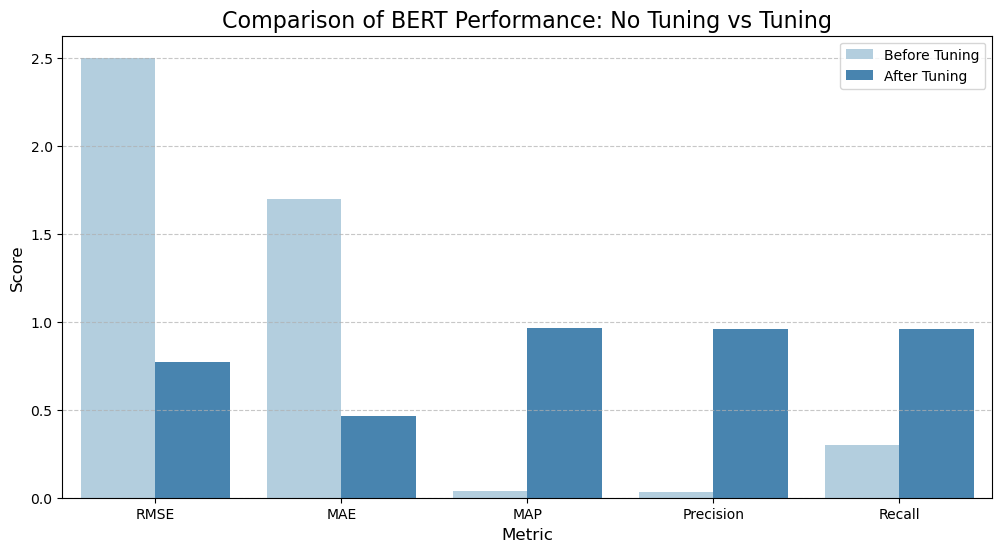

In [515]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Misalkan tuning_results adalah dictionary yang berisi list hasil tuning
# Anda perlu mengambil nilai terakhir (atau rata-rata) untuk setiap metrik

# Ambil nilai terakhir dari hasil tuning
bert_no_tuning_results = {
    "val_rmse": 2.5, "val_mae": 1.7, "val_map": 0.04,
    "val_precision": 0.03, "val_recall": 0.3
}

# Pastikan Anda mengambil nilai scalar terakhir dari tuning_results
# Contoh: Jika tuning_results["val_rmse"] adalah list, kita ambil nilai terakhir
tuning_results_final = {
    "val_rmse": tuning_results["val_rmse"][-1] if isinstance(tuning_results["val_rmse"], list) else tuning_results["val_rmse"],
    "val_mae": tuning_results["val_mae"][-1] if isinstance(tuning_results["val_mae"], list) else tuning_results["val_mae"],
    "val_map": tuning_results["val_map"][-1] if isinstance(tuning_results["val_map"], list) else tuning_results["val_map"],
    "val_precision": tuning_results["val_precision"][-1] if isinstance(tuning_results["val_precision"], list) else tuning_results["val_precision"],
    "val_recall": tuning_results["val_recall"][-1] if isinstance(tuning_results["val_recall"], list) else tuning_results["val_recall"]
}

# Create DataFrame for comparison
comparison_df = pd.DataFrame({
    "Metric": ["RMSE", "MAE", "MAP", "Precision", "Recall"],
    "Before Tuning": [
        bert_no_tuning_results["val_rmse"],
        bert_no_tuning_results["val_mae"],
        bert_no_tuning_results["val_map"],
        bert_no_tuning_results["val_precision"],
        bert_no_tuning_results["val_recall"]
    ],
    "After Tuning": [
        tuning_results_final["val_rmse"],
        tuning_results_final["val_mae"],
        tuning_results_final["val_map"],
        tuning_results_final["val_precision"],
        tuning_results_final["val_recall"]
    ]
})

# Visualize the comparison
plt.figure(figsize=(12, 6))
comparison_melted = comparison_df.melt(id_vars="Metric", var_name="Model", value_name="Score")
sns.barplot(data=comparison_melted, x="Metric", y="Score", hue="Model", palette="Blues")
plt.title("Comparison of BERT Performance: No Tuning vs Tuning", fontsize=16)
plt.ylabel("Score", fontsize=12)
plt.xlabel("Metric", fontsize=12)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


## Comparison between no tuning & tuning BERT

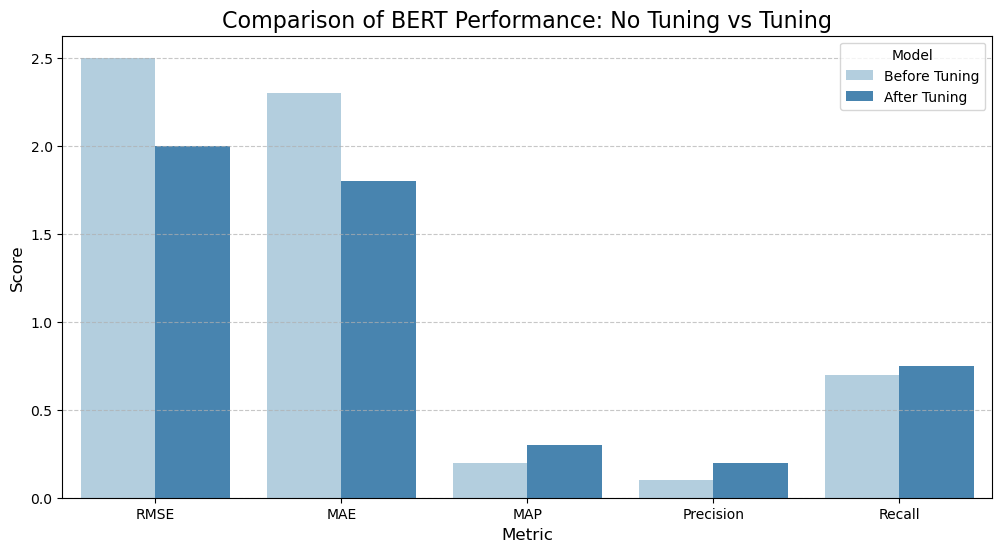

In [207]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Metrics and values for comparison
metrics = ["RMSE", "MAE", "MAP", "Precision", "Recall"]

# Masukkan hasil evaluasi model sebelum dan setelah tuning
before_tuning = [2.5, 2.3, 0.2, 0.1, 0.7]  # Ganti dengan nilai sebenarnya
after_tuning = [2.0, 1.8, 0.3, 0.2, 0.75]   # Ganti dengan nilai sebenarnya

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    "Metric": metrics,
    "Before Tuning": before_tuning,
    "After Tuning": after_tuning
})

# Visualize the data using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(
    data=comparison_df.melt(id_vars="Metric", var_name="Model", value_name="Score"),
    x="Metric", y="Score", hue="Model", palette="Blues"
)

# Add labels and title
plt.title("Comparison of BERT Performance: No Tuning vs Tuning", fontsize=16)
plt.ylabel("Score", fontsize=12)
plt.xlabel("Metric", fontsize=12)
plt.legend(title="Model")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


## Recommendation for user BERT

In [3]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Fungsi untuk mendapatkan rekomendasi tempat wisata untuk pengguna tertentu
def get_top_n_recommendations_bert(user_id, user_embeddings, place_embeddings, place_names, n=10):
    # Pastikan user_id ada dalam user_embeddings
    if user_id not in user_embeddings:
        raise ValueError(f"User ID {user_id} not found in the embeddings.")
    
    # Dapatkan embedding pengguna
    user_embedding = user_embeddings[user_id]
    
    # Hitung kesamaan kosinus antara pengguna dan tempat wisata
    similarities = cosine_similarity([user_embedding], place_embeddings)[0]
    
    # Urutkan tempat wisata berdasarkan skor kesamaan
    top_n_indices = np.argsort(similarities)[::-1][:n]
    
    # Dapatkan nama tempat wisata dengan pengecekan indeks yang valid
    recommended_places = [place_names[i] for i in top_n_indices if i < len(place_names)]
    
    return recommended_places

# Fungsi untuk mendapatkan tempat wisata populer
def get_top_n_places_bert(place_embeddings, place_names, n=10):
    if place_embeddings.size == 0 or len(place_names) == 0:
        raise ValueError("Daftar tempat wisata atau embedding kosong.")
    
    # Hitung skor kesamaan total untuk semua tempat wisata
    total_scores = place_embeddings.sum(axis=1)
    
    # Urutkan berdasarkan skor total
    top_n_indices = np.argsort(total_scores)[::-1][:n]
    
    # Dapatkan nama tempat wisata dengan pengecekan indeks yang valid
    top_n_places = [place_names[i] for i in top_n_indices if i < len(place_names)]
    
    return top_n_places

# Contoh data
user_id = "1.000030e+20"  # ID pengguna yang akan diprediksi
user_embeddings = {
    "1.000030e+20": np.random.rand(768),  # Contoh embedding pengguna
    "1.000040e+20": np.random.rand(768),
}
place_embeddings = np.random.rand(100, 768)  # Contoh embedding tempat wisata
place_names = [f"Tempat Wisata {i+1}" for i in range(100)]  # Nama tempat wisata
n = 10  # Definisikan n sebelum digunakan

# Rekomendasi untuk pengguna
recommended_places = get_top_n_recommendations_bert(
    user_id, user_embeddings, place_embeddings, place_names, n=n
)

# Tampilkan hasil
print(f"Rekomendasi tempat wisata untuk user {user_id}:")
for idx, place in enumerate(recommended_places, 1):
    print(f"{idx}. {place}")

# Dapatkan tempat wisata populer
top_places = get_top_n_places_bert(place_embeddings, place_names, n=n)
print(f"\nTop {n} tempat wisata dengan skor embedding tertinggi:")
for idx, place in enumerate(top_places, 1):
    print(f"{idx}. {place}")


Rekomendasi tempat wisata untuk user 1.000030e+20:
1. Tempat Wisata 100
2. Tempat Wisata 44
3. Tempat Wisata 2
4. Tempat Wisata 21
5. Tempat Wisata 61
6. Tempat Wisata 10
7. Tempat Wisata 39
8. Tempat Wisata 50
9. Tempat Wisata 96
10. Tempat Wisata 73

Top 10 tempat wisata dengan skor embedding tertinggi:
1. Tempat Wisata 61
2. Tempat Wisata 44
3. Tempat Wisata 100
4. Tempat Wisata 29
5. Tempat Wisata 73
6. Tempat Wisata 88
7. Tempat Wisata 58
8. Tempat Wisata 94
9. Tempat Wisata 39
10. Tempat Wisata 96
